In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_poll = pd.read_csv("Delhi_Pollution.csv")
df_uber = pd.read_csv("train-data.csv")
df_uber.pop("Unnamed: 0")
df_poll.head(2)
df_uber.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [3]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [4]:
df_uber.duplicated().sum()

0

In [6]:
xd = df_uber.groupby(["Fuel_Type","Transmission"])["Price"].mean().reset_index()
xd

,Fuel_Type,Transmission,Price
0,CNG,Manual,3.516786
1,Diesel,Automatic,24.583078
2,Diesel,Manual,6.636190
3,Electric,Automatic,12.875000
4,LPG,Manual,2.487000
5,Petrol,Automatic,11.258738
6,Petrol,Manual,4.113947


In [7]:
xd.pivot(index="Fuel_Type", columns="Transmission", values="Price",)

Transmission,Automatic,Manual
Fuel_Type,,
CNG,NaN,3.516786
Diesel,24.583078,6.636190
Electric,12.875000,NaN
LPG,NaN,2.487000
Petrol,11.258738,4.113947


In [9]:
mean_price_pivot = df_uber.pivot_table(index="Fuel_Type", columns="Transmission", values="Price", aggfunc='mean')
mean_price_pivot


Transmission,Automatic,Manual
Fuel_Type,,
CNG,NaN,3.516786
Diesel,24.583078,6.636190
Electric,12.875000,NaN
LPG,NaN,2.487000
Petrol,11.258738,4.113947


In [13]:
xdd = mean_price_pivot.reset_index()
xdd

Transmission,Fuel_Type,Automatic,Manual
0,CNG,NaN,3.516786
1,Diesel,24.583078,6.636190
2,Electric,12.875000,NaN
3,LPG,NaN,2.487000
4,Petrol,11.258738,4.113947


In [15]:
pd.concat([xdd,xdd], axis = 0)

Transmission,Fuel_Type,Automatic,Manual
0,CNG,NaN,3.516786
1,Diesel,24.583078,6.636190
2,Electric,12.875000,NaN
3,LPG,NaN,2.487000
4,Petrol,11.258738,4.113947
0,CNG,NaN,3.516786
1,Diesel,24.583078,6.636190
2,Electric,12.875000,NaN
3,LPG,NaN,2.487000
4,Petrol,11.258738,4.113947


In [11]:
melted_df = mean_price_pivot.reset_index().melt(id_vars='Fuel_Type', value_name='Price')
melted_df


,Fuel_Type,Transmission,Price
0,CNG,Automatic,NaN
1,Diesel,Automatic,24.583078
2,Electric,Automatic,12.875000
3,LPG,Automatic,NaN
4,Petrol,Automatic,11.258738
5,CNG,Manual,3.516786
6,Diesel,Manual,6.636190
7,Electric,Manual,NaN
8,LPG,Manual,2.487000
9,Petrol,Manual,4.113947


In [9]:
df_uber.memory_usage()

Index                  128
Name                 48152
Location             48152
Year                 48152
Kilometers_Driven    48152
Fuel_Type            48152
Transmission         48152
Owner_Type           48152
Mileage              48152
Engine               48152
Power                48152
Seats                48152
New_Price            48152
Price                48152
dtype: int64

In [10]:
for x in df_uber:
    print(x)

Name
Location
Year
Kilometers_Driven
Fuel_Type
Transmission
Owner_Type
Mileage
Engine
Power
Seats
New_Price
Price


In [11]:
df_uber.loc[(df_uber.index.isin(range(0,8)))&(df_uber["Year"]<2015),["Name", "Year"]]

,Name,Year
0,Maruti Wagon R LXI CNG,2010
2,Honda Jazz V,2011
3,Maruti Ertiga VDI,2012
4,Audi A4 New 2.0 TDI Multitronic,2013
5,Hyundai EON LPG Era Plus Option,2012
6,Nissan Micra Diesel XV,2013


In [12]:
df_uber.quantile([.1, .5], method="table", interpolation="nearest")

C:\Users\91981\AppData\Local\Temp\ipykernel_23464\1875788966.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_uber.quantile([.1, .5], method="table", interpolation="nearest")


,Year,Kilometers_Driven,Seats,Price
0.1,2009,66149,5.0,2.45
0.5,2014,45000,5.0,4.80


<AxesSubplot: >

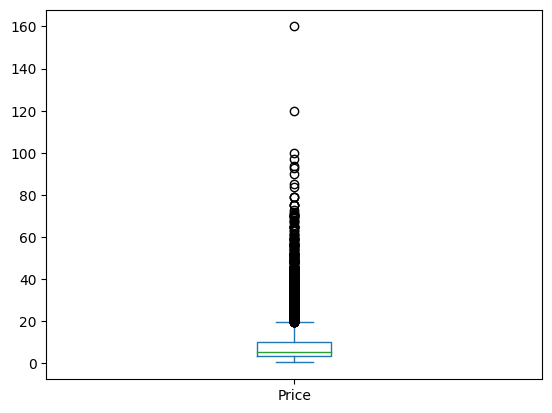

In [25]:
df_uber["Price"].plot.box()